In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle= True
)



Found 800 files belonging to 2 classes.


In [ ]:

image_batch =32
for  label_batch ,image_batch in dataset.take(1):
    print(image_batch)
    print(label_batch.numpy())

In [31]:
 class_names = dataset.class_names

In [ ]:
plt.figure(figsize = (10,10))
for  image_batch , label_batch in dataset.take(1):
    for i in range(12):
        xp =plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [33]:
len(dataset)

25

In [34]:
train_size = 0.8
len(dataset)*train_size

20.0

In [37]:
train_ds = dataset.take(20)


In [38]:
len(train_ds)

20

In [39]:
test_ds=dataset.skip(20)
test_ds

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
len(test_ds)

5

In [41]:
val_ds = dataset.take(2)
len(val_ds)


2

In [48]:
from tensorflow.keras import models , layers
data_agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizental_and_verticle"),
    layers.RandomRotation(0.2)
])

In [52]:
from tensorflow.keras import Sequential
image_size =256
dataset = Sequential([
    layers.Resizing(image_size , image_size),
    layers.Rescaling(1./255)
])

In [53]:
train_ds = train_ds.map(
    lambda x, y: (data_agumentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [55]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 2

# Define the Sequential model
model = models.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.compile(optimizer= "adam", loss="SparseCategoricalCrossentropy" , metrics = ['accuracy'])
history=model.fit(train_ds ,batch_size =32 ,epochs =10 , validation_data = val_ds , verbose =1 )
    

C:\Users\gurud\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.6257 - loss: 4.8924 - val_accuracy: 0.8594 - val_loss: 0.4367
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8303 - loss: 0.4778 - val_accuracy: 0.8438 - val_loss: 0.4918
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8437 - loss: 0.4057 - val_accuracy: 0.9219 - val_loss: 0.2704
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.8779 - loss: 0.3548 - val_accuracy: 0.8125 - val_loss: 0.4079
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.8782 - loss: 0.3063 - val_accuracy: 0.7969 - val_loss: 0.4330
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8671 - loss: 0.3361 - val_accuracy: 0.8906 - val_loss: 0.3373
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.8743 - loss: 0.3397 - val_accuracy: 0.9219 - val_loss: 0.2970
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.8941 - loss: 0.2824 - val_accuracy: 0.8750 - v

In [61]:
history
history.params

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss  =history.history['val_loss']

first image to predict
actual label: tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step
predicted label: tumor


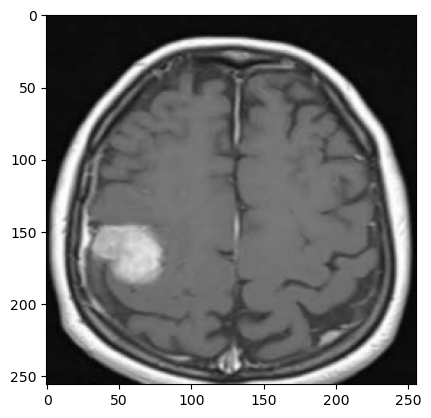

In [79]:

import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


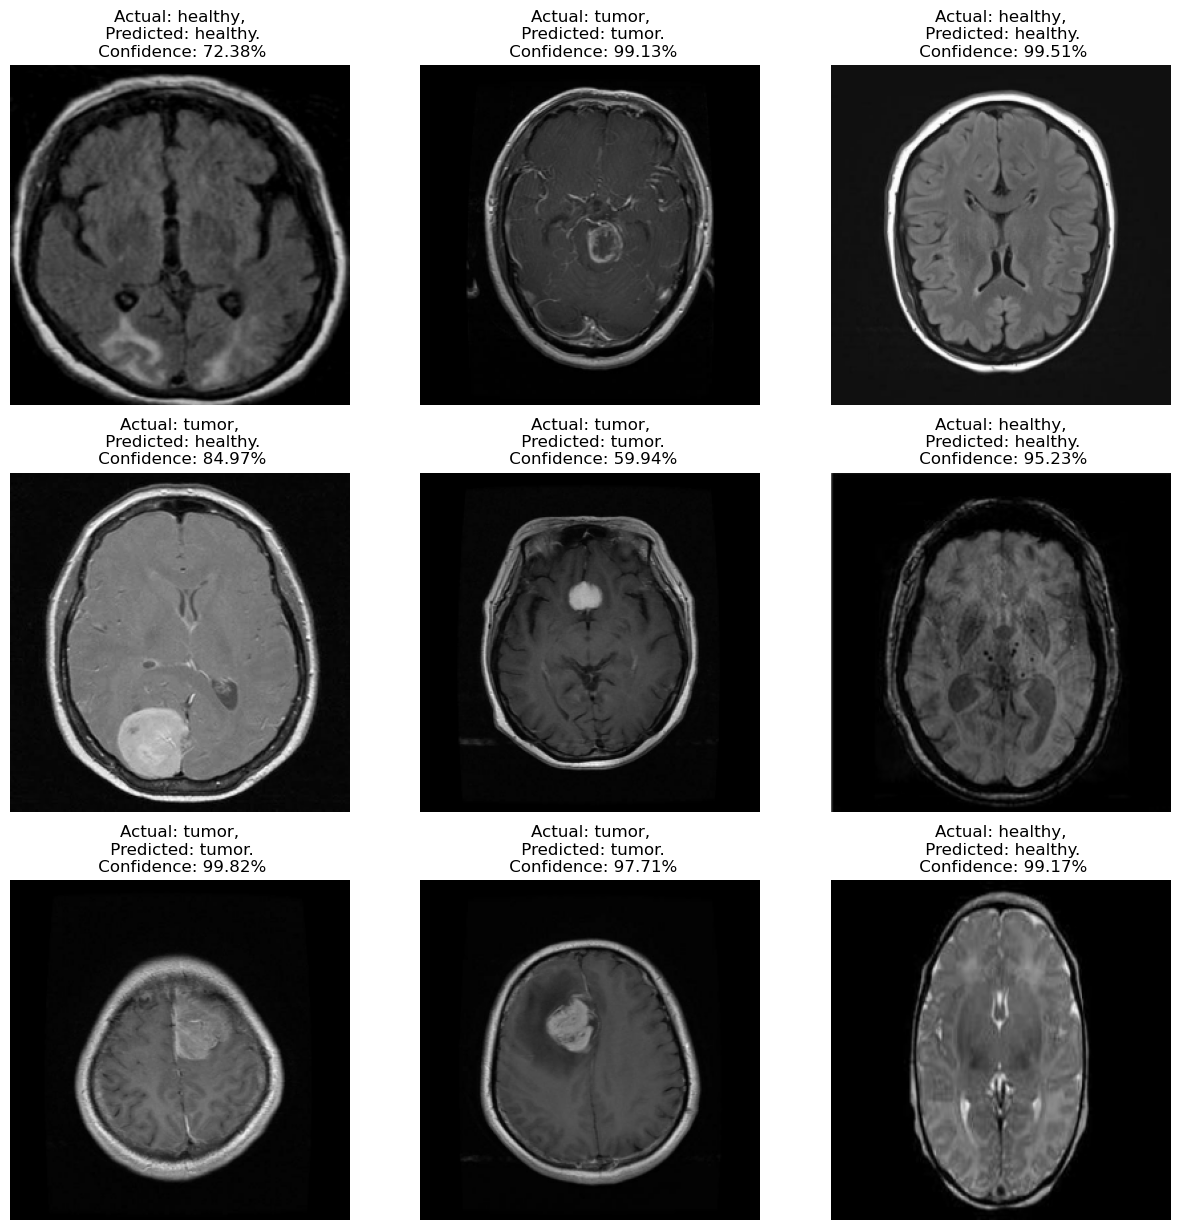

In [83]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")